In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

In [ ]:
data = pd.read_csv("/content/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.shape #(row,column)

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
y = data.sex.values
x_data = data.drop(["sex"],axis =  1)

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#b0
b0_ = linreg.intercept_
print("b0_: ",b0_)

b0_:  0.645994160287193


In [ ]:
#b1
b1=pd.DataFrame(linreg.coef_,x.columns,columns=['Coef']) 
b1

,Coef
age,-0.249516
cp,0.153758
trestbps,-0.201200
chol,-0.748821
fbs,0.018851
restecg,-0.154048
thalach,0.226804
exang,0.062593
oldpeak,0.112038
slope,0.107938


In [ ]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_linear = cross_val_score(estimator = linreg, X = x_train, y = y_train, cv = 10)
print("CV: ", cv_linear.mean())

CV:  0.05911086396596623


In [ ]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_linear_train = linreg.predict(x_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
print('R2_score (train): ', r2_score_linear_train)

R2_score (train):  0.17937113360186352


In [ ]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_linear_test = linreg.predict(x_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)
print('R2_score (test): ', r2_score_linear_test)

R2_score (test):  0.15364089910258283


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("RMSE: ", rmse_linear)

RMSE:  0.44757310094081754


In [ ]:
#MSE
import sklearn.metrics as metrics
lr_MSE=metrics.mean_squared_error(y_test, y_pred_linear_test)
print("MSE Score:", lr_MSE)

MSE Score: 0.20032168068577924


In [ ]:
#MAE
import sklearn.metrics as metrics
lr_MAE= metrics.mean_absolute_error(y_test, y_pred_linear_test)
print('MAE:',lr_MAE)

MAE: 0.3806729050103342


In [ ]:
#Accuracy
from sklearn.metrics import  accuracy_score
print("Accuracy of Linear Regression: ",linreg.score(x_test,y_test))

Accuracy of Linear Regression:  0.15364089910258283


# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polreg = PolynomialFeatures(degree = 2)
x_poly = polreg.fit_transform(x_train)
polreg.fit(x_poly, y_train)
regpol = LinearRegression()
regpol.fit(x_poly, y_train)

LinearRegression()

In [ ]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_pol = cross_val_score(estimator = regpol, X = x_train, y = y_train, cv = 10)
print('CV: ', cv_pol.mean())

CV:  0.05911086396596623


In [ ]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_pol_train = regpol.predict(polreg.fit_transform(x_train))
r2_score_pol_train = r2_score(y_train, y_pred_pol_train)
print('R2_score (train): ', r2_score_pol_train)

R2_score (train):  0.6098839755796165


In [ ]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_pol_test = regpol.predict(polreg.fit_transform(x_test))
r2_score_pol_test = r2_score(y_test, y_pred_pol_test)
print('R2_score (test): ', r2_score_pol_test)

R2_score (test):  -0.4202609524616092


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_pol = (np.sqrt(mean_squared_error(y_test, y_pred_pol_test)))
print("RMSE: ", rmse_pol)

RMSE:  0.5797899951296607


In [ ]:
#MSE
import sklearn.metrics as metrics
pol_MSE=metrics.mean_squared_error(y_test, y_pred_pol_test)
print("MSE Score:", pol_MSE)

MSE Score: 0.3361564384524519


In [185]:
#MAE
import sklearn.metrics as metrics
pol_MAE=metrics.mean_absolute_error(y_test, y_pred_pol_test)
print('MAE:',pol_MAE)

MAE: 0.44720030118834125


# **Decision Tree Classification**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(x_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(estimator = dt, X = x_train, y = y_train, cv = 10)
print('CV: ', cv_dt.mean())

CV:  0.6833333333333333


In [ ]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_dt_train = dt.predict(x_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)
print('R2_score (train): ', r2_score_dt_train)

R2_score (train):  1.0


In [ ]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_dt_test = dt.predict(x_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)
print('R2_score (test): ', r2_score_dt_test)

R2_score (test):  -0.6249999999999998


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print("RMSE: ", rmse_dt)

RMSE:  0.6201736729460423


In [ ]:
#MSE
import sklearn.metrics as metrics
dt_MSE=metrics.mean_squared_error(y_test, y_pred_dt_test)
print("MSE Score:", dt_MSE)

MSE Score: 0.38461538461538464


In [186]:
#MAE
import sklearn.metrics as metrics
dt_MAE= metrics.mean_absolute_error(y_test, y_pred_dt_test)
print('MAE:',dt_MAE)

MAE: 0.38461538461538464


In [ ]:
#Accuracy
print("score: ", dt.score(x_test,y_test))

score:  0.6153846153846154


# **Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, max_depth=3,random_state = 1)
rf.fit(x_train, y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=1)

In [ ]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_rf = cross_val_score(estimator = rf, X = X_scaled, y = y_train.ravel(), cv = 10)
print('CV: ', cv_rf.mean())

CV:  0.735930735930736


In [ ]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_rf_train = rf.predict(x_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
print('R2_score (train): ', r2_score_rf_train)

R2_score (train):  -0.17381391814135272


In [ ]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_rf_test = rf.predict(x_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)
print('R2_score (test): ', r2_score_rf_test)

R2_score (test):  -0.48571428571428554


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print("RMSE: ", rmse_rf)

RMSE:  0.5929994533288809


In [ ]:
#MSE
import sklearn.metrics as metrics
rf_MSE=metrics.mean_squared_error(y_test, y_pred_rf_test)
print("MSE Score:", rf_MSE)

MSE Score: 0.3516483516483517


In [187]:
#MAE
import sklearn.metrics as metrics
rf_MAE=metrics.mean_absolute_error(y_test, y_pred_rf_test)
print('MAE:',rf_MAE )

MAE: 0.3516483516483517


In [ ]:
#Accuracy
print("score: ", rf.score(x_test,y_test))

score:  0.6483516483516484


In [241]:
Acc_train = []
Acc_test = []
for i in range (1,500):
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier(n_estimators = i,max_depth=3,random_state = 1)
  rf.fit(x_train,y_train)
  Acc_train.append(rf.score(x_test,y_test))
  Acc_test.append(rf.score(x_train,y_train))

In [242]:
print("Max Accuracy of Train set" ,max(Acc_train))
print("Max Accuracy of Test set",max(Acc_test))

Max Accuracy of Train set 0.6923076923076923
Max Accuracy of Test set 0.7971698113207547


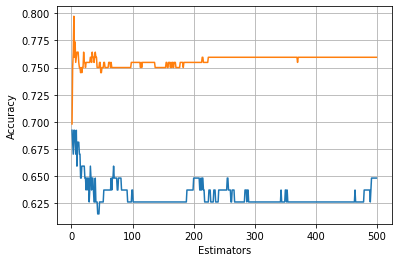

In [243]:
plt.plot(range(1,500),Acc_train)
plt.plot(range(1,500),Acc_test)
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [232]:
Acc_train = []
Acc_test = []
for i in range (1,4):
  for j in range(1,500):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = j,max_depth=i,random_state = 1)
    rf.fit(x_train,y_train)
    Acc_train.append(rf.score(x_test,y_test))
    Acc_test.append(rf.score(x_train,y_train))

In [234]:
len(Acc_train)

1497

In [235]:
len(Acc_test)

1497

In [238]:
print("Max Accuracy of Train set" ,max(Acc_train))
print("Max Accuracy of Test set",max(Acc_test))

Max Accuracy of Train set 0.6923076923076923
Max Accuracy of Test set 0.7971698113207547


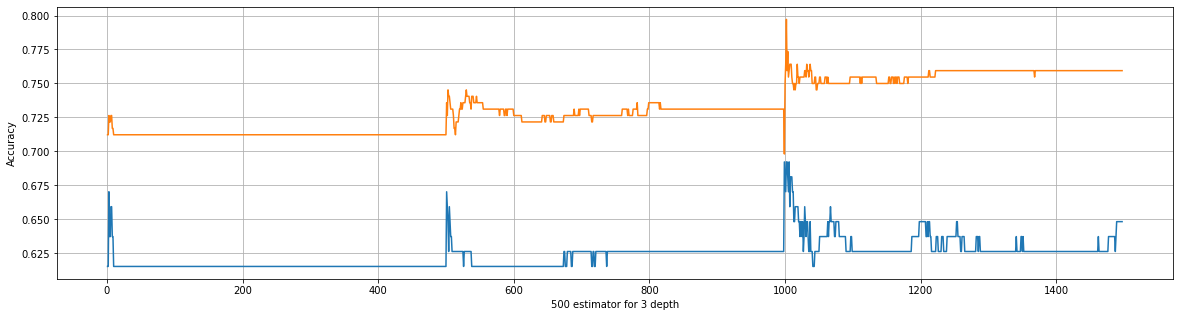

In [240]:
plt.figure(figsize=(20,5))
plt.plot(range(1,1498),Acc_train)
plt.plot(range(1,1498),Acc_test)
plt.xlabel("500 estimator for 3 depth")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# **Support Vector Machine**

In [205]:
from sklearn.svm import SVC
svm = SVC(random_state = 1,C=1)
svm.fit(x_train,y_train)

SVC(C=1, random_state=1)

In [206]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_svm = cross_val_score(estimator = svm, X = X_scaled, y = y_train.ravel(), cv = 10)
print('CV: ', cv_svm.mean())

CV:  0.730952380952381


In [207]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_svm_train = svm.predict(x_train)
r2_score_svm_train = r2_score(y_train, y_pred_svm_train)
print('R2_score (train): ', r2_score_svm_train)

R2_score (train):  -0.19682987732059476


In [208]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_svm_test = svm.predict(x_test)
r2_score_svm_test = r2_score(y_test, y_pred_svm_test)
print('R2_score (test): ', r2_score_svm_test)

R2_score (test):  -0.6249999999999998


In [209]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_svm = (np.sqrt(mean_squared_error(y_test, y_pred_svm_test)))
print("RMSE: ", rmse_svm)

RMSE:  0.6201736729460423


In [210]:
#MSE
import sklearn.metrics as metrics
svm_MSE=metrics.mean_squared_error(y_test, y_pred_svm_test)
print("MSE Score:", svm_MSE)

MSE Score: 0.38461538461538464


In [211]:
#MAE
import sklearn.metrics as metrics
svm_MAE=metrics.mean_absolute_error(y_test, y_pred_svm_test)
print('MAE:',svm_MAE)

MAE: 0.38461538461538464


In [212]:
#Accuracy
print("score: ", svm.score(x_test,y_test))

score:  0.6153846153846154


In [230]:
Acc_train=[]
Acc_test=[]
for i in range(1,100):
  model_svm = SVC(C=i)
  model_svm.fit(x_train,y_train)
  Acc_train.append(model_svm.score(x_test,y_test))
  Acc_test.append(model_svm.score(x_train,y_train))
 

In [231]:
print("Max Accuracy of Train set" ,max(Acc_train))
print("Max Accuracy of Test set",max(Acc_test))

Max Accuracy of Train set 0.7582417582417582
Max Accuracy of Test set 0.9622641509433962


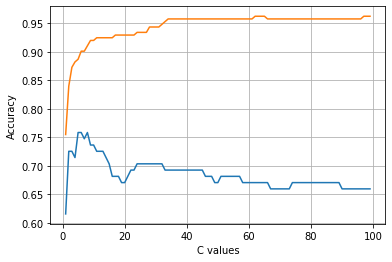

In [220]:
plt.plot(range(1,100),Acc_train)
plt.plot(range(1,100),Acc_test)
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# **Naive Bayes**

In [294]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [296]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(estimator = nb, X = X_scaled, y = y_train.ravel(), cv = 10)
print('CV: ', cv_nb.mean())

CV:  0.7259740259740259


In [298]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_nb_train = nb.predict(x_train)
r2_score_nb_train = r2_score(y_train, y_pred_nb_train)
print('R2_score (train): ', r2_score_nb_train)

R2_score (train):  -0.24286179567907928


In [299]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_nb_test = nb.predict(x_test)
r2_score_nb_test = r2_score(y_test, y_pred_nb_test)
print('R2_score (test): ', r2_score_nb_test)

R2_score (test):  -0.25357142857142856


In [300]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_nb = (np.sqrt(mean_squared_error(y_test, y_pred_nb_test)))
print("RMSE: ", rmse_nb)

RMSE:  0.5447047794019222


In [301]:
#MSE
import sklearn.metrics as metrics
nb_MSE=metrics.mean_squared_error(y_test, y_pred_nb_test)
print("MSE Score:", nb_MSE)

MSE Score: 0.2967032967032967


In [302]:
#MAE
import sklearn.metrics as metrics
nb_MAE=metrics.mean_absolute_error(y_test, y_pred_nb_test)
print('MAE:',nb_MAE)

MAE: 0.2967032967032967


In [303]:
#Accuracy
print("score: ", nb.score(x_test,y_test))

score:  0.7032967032967034


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_svm = cross_val_score(estimator = knn, X = X_scaled, y = y_train.ravel(), cv = 10)
print('CV: ', cv_svm.mean())

CV:  0.7119047619047619


In [ ]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_knn_train = knn.predict(x_train)
r2_score_knn_train = r2_score(y_train, y_pred_knn_train)
print('R2_score (train): ', r2_score_knn_train)

R2_score (train):  0.1484095103680383


In [ ]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_knn_test = knn.predict(x_test)
r2_score_knn_test = r2_score(y_test, y_pred_knn_test)
print('R2_score (test): ', r2_score_knn_test)

R2_score (test):  -0.20714285714285707


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_knn_test)))
print("RMSE: ", rmse_knn)

RMSE:  0.5345224838248488


In [ ]:
#MSE
import sklearn.metrics as metrics
knn_MSE=metrics.mean_squared_error(y_test, y_pred_knn_test)
print("MSE Score:", knn_MSE)

MSE Score: 0.2857142857142857


In [197]:
#MAE
import sklearn.metrics as metrics
KNN_MAE=metrics.mean_absolute_error(y_test, y_pred_knn_test)
print('MAE:',KNN_MAE)

MAE: 0.2857142857142857


In [ ]:
#Accuracy
print("score: ", knn.score(x_test,y_test))

score:  0.7142857142857143


# **Logistic Regression**

In [ ]:
from sklearn import linear_model
logreg= linear_model.LogisticRegression(max_iter=500)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_logreg = cross_val_score(estimator = logreg, X = X_scaled, y = y_train.ravel(), cv = 10)
print('CV: ', cv_logreg.mean())

CV:  0.720995670995671


In [ ]:
#R^2 Score the Train set
from sklearn.metrics import r2_score
y_pred_logreg_train = logreg.predict(x_train)
r2_score_logreg_train = r2_score(y_train, y_pred_logreg_train)
print('R2_score (train): ', r2_score_logreg_train)

R2_score (train):  -0.26587775485832155


In [ ]:
#R^2 Score Test Set
from sklearn.metrics import r2_score
y_pred_logreg_test = logreg.predict(x_test)
r2_score_logreg_test = r2_score(y_test, y_pred_logreg_test)
print('R2_score (test): ', r2_score_logreg_test)

R2_score (test):  -0.48571428571428554


In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_logreg = (np.sqrt(mean_squared_error(y_test, y_pred_logreg_test)))
print("RMSE: ", rmse_logreg)

RMSE:  0.5929994533288809


In [189]:
#MSE
import sklearn.metrics as metrics
logreg_MSE=metrics.mean_squared_error(y_test, y_pred_logreg_test)
print("MSE Score:", knn_MSE)

MSE Score: 0.2857142857142857


In [192]:
#MAE
import sklearn.metrics as metrics
logreg_MAE=metrics.mean_absolute_error(y_test, y_pred_logreg_test)
print('MAE:', logreg_MAE)

MAE: 0.3516483516483517


In [191]:
#Accuracy
print("score: ", logreg.score(x_test,y_test))

score:  0.6483516483516484


In [304]:
models = [('Linear Regression', cv_linear.mean(), r2_score_linear_train, r2_score_linear_test, rmse_linear, lr_MSE, lr_MAE, linreg.score(x_test,y_test)),
          ('Polynomial Regression', cv_pol.mean(),r2_score_pol_train,r2_score_pol_test,rmse_pol,pol_MSE,pol_MAE,),
          ('Decision Tree Classifier', cv_dt.mean(),r2_score_dt_train,r2_score_dt_test,rmse_dt,dt_MSE,dt_MAE,dt.score(x_test,y_test)),
          ('Random Forest', cv_rf.mean(),r2_score_rf_train,r2_score_rf_test,rmse_rf,rf_MSE,rf_MAE,rf.score(x_test,y_test) ),
          ('Support Vector Machine', cv_svm.mean(),r2_score_svm_train,r2_score_svm_test,rmse_svm,svm_MSE,svm_MAE,svm.score(x_test,y_test)),
          ('Naive Bayes', cv_nb.mean(),r2_score_nb_train,r2_score_nb_test,rmse_nb,nb_MSE,nb_MAE,nb.score(x_test,y_test)),
          ('K-Nearest Classifier',cv_svm.mean(), r2_score_knn_train, r2_score_knn_test, rmse_knn, knn_MSE, KNN_MAE , knn.score(x_test,y_test)),
          ('Logistic Regression',cv_logreg.mean(), r2_score_logreg_train, r2_score_logreg_test,rmse_logreg,logreg_MSE,logreg_MAE, logreg.score(x_test,y_test)) 
         ]

In [305]:
predict = pd.DataFrame(data = models, columns=['Model', 'Cross-Validation', 'R^2_Score(training)', 'R^2_Score(test)','RMSE','MSE','MAE','Accuracy Score' ])
predict

,Model,Cross-Validation,R^2_Score(training),R^2_Score(test),RMSE,MSE,MAE,Accuracy Score
0,Linear Regression,0.059111,0.179371,0.153641,0.447573,0.200322,0.380673,0.153641
1,Polynomial Regression,0.059111,0.609884,-0.420261,0.579790,0.336156,0.447200,NaN
2,Decision Tree Classifier,0.683333,1.000000,-0.625000,0.620174,0.384615,0.384615,0.615385
3,Random Forest,0.735931,-0.173814,-0.485714,0.592999,0.351648,0.351648,0.648352
4,Support Vector Machine,0.725974,-0.196830,-0.625000,0.620174,0.384615,0.384615,0.615385
5,Naive Bayes,0.725974,-0.242862,-0.253571,0.544705,0.296703,0.296703,0.703297
6,K-Nearest Classifier,0.725974,0.148410,-0.207143,0.534522,0.285714,0.285714,0.714286
7,Logistic Regression,0.720996,-0.265878,-0.485714,0.592999,0.351648,0.351648,0.648352


# **Visualization**

Text(0, 0.5, 'Model')

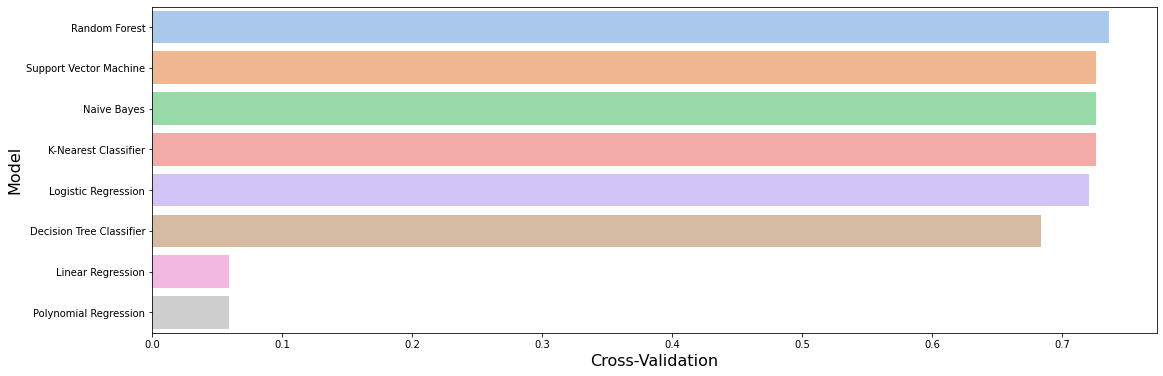

In [306]:
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Cross-Validation', y='Model', data=predict, ax = axe,palette='pastel')
axe.set_xlabel('Cross-Validation', size=16)
axe.set_ylabel('Model', size=16)

Text(0, 0.5, 'Model')

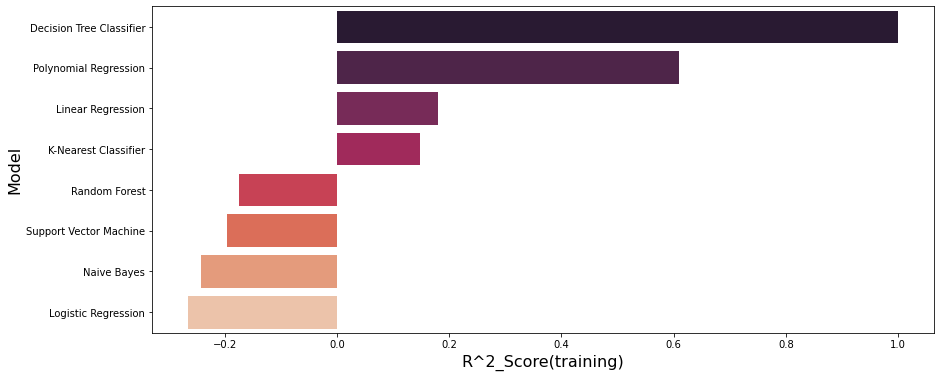

In [307]:
predict.sort_values(by=['R^2_Score(training)'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='R^2_Score(training)', y='Model', data=predict, ax = axe,palette="rocket")
axe.set_xlabel('R^2_Score(training)', size=16)
axe.set_ylabel('Model', size=16)

Text(0, 0.5, 'Model')

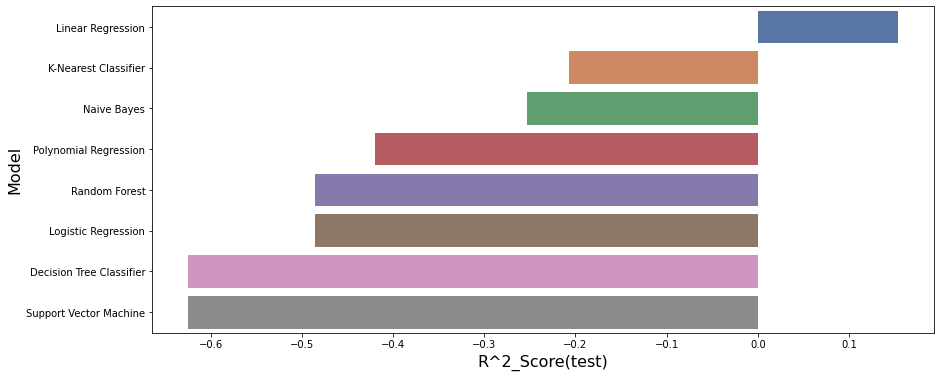

In [308]:
predict.sort_values(by=['R^2_Score(test)'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='R^2_Score(test)', y='Model', data=predict, ax = axe, palette="deep")
axe.set_xlabel('R^2_Score(test)', size=16)
axe.set_ylabel('Model',size=16)

Text(0, 0.5, 'Model')

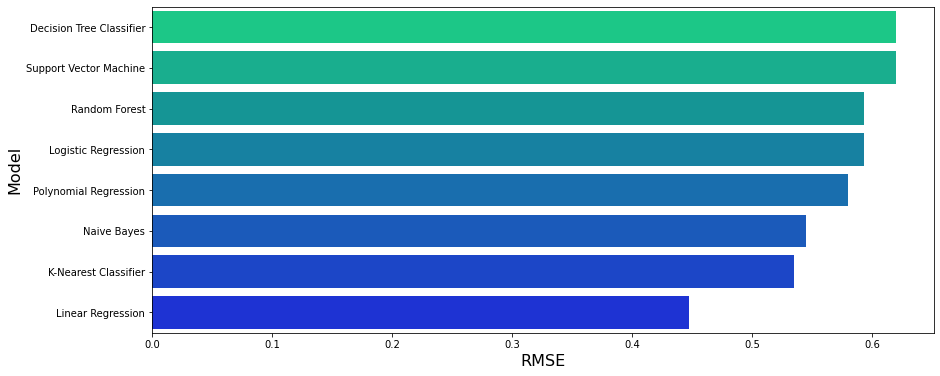

In [309]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE', y='Model', data=predict, ax = axe, palette="winter_r")
axe.set_xlabel('RMSE', size=16)
axe.set_ylabel('Model',size=16)

Text(0, 0.5, 'Model')

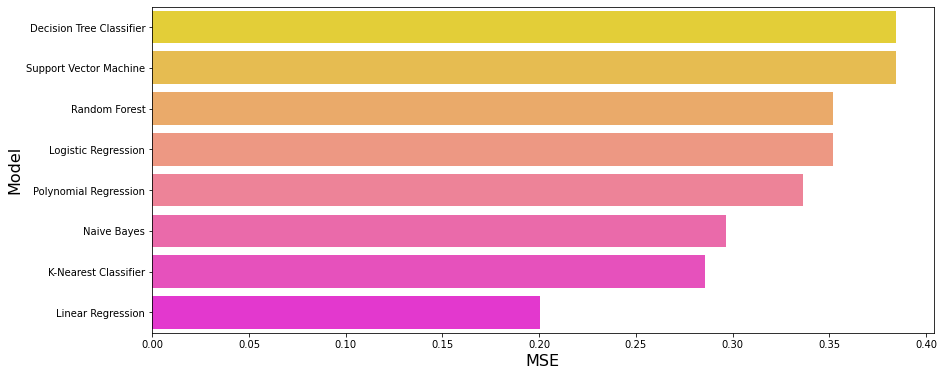

In [310]:
predict.sort_values(by=['MSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='MSE', y='Model', data=predict, ax = axe, palette="spring_r")
axe.set_xlabel('MSE', size=16)
axe.set_ylabel('Model',size=16)

Text(0, 0.5, 'Model')

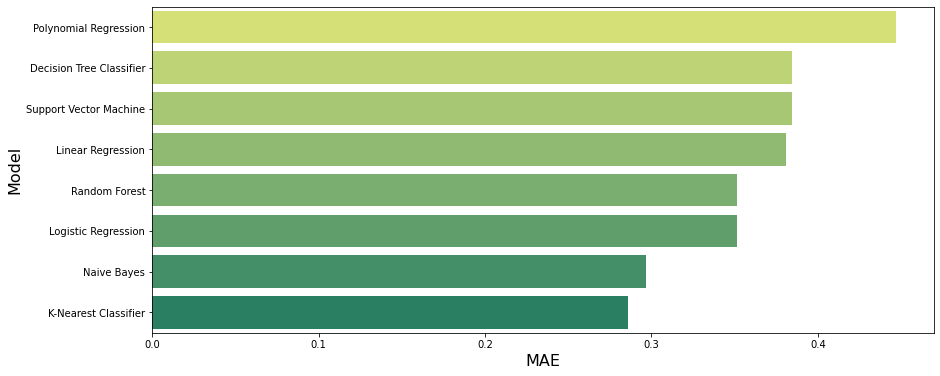

In [311]:
predict.sort_values(by=['MAE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='MAE', y='Model', data=predict, ax = axe, palette="summer_r")
axe.set_xlabel('MAE', size=16)
axe.set_ylabel('Model',size=16)

Text(0, 0.5, 'Model')

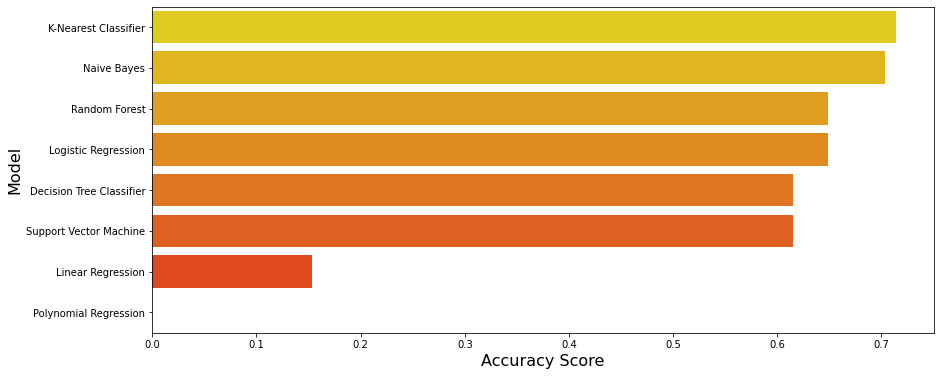

In [312]:
predict.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='Accuracy Score', y='Model', data=predict, ax = axe, palette="autumn_r")
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model',size=16)

# **Confusion Matrix**

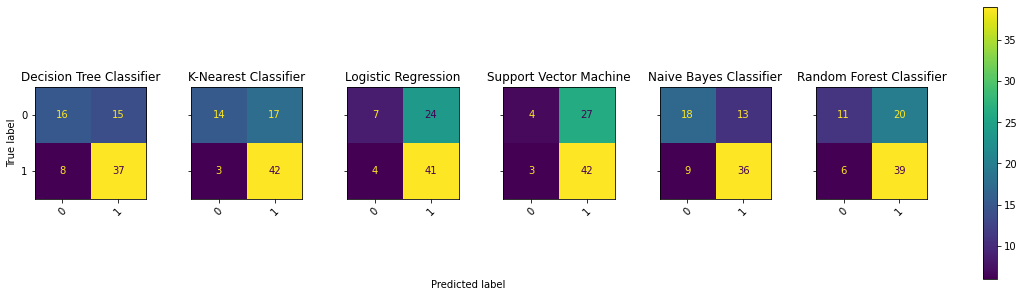

In [316]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 100,random_state = 1)


}

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=1)

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(x_train, y_train).predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.4, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()